<a href="https://colab.research.google.com/github/dirkh24/MNIST_Classifications/blob/master/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Example

In [0]:
import numpy as np
from keras.layers import Dense, Dropout
from keras import Sequential

In [0]:
# Import MNIST Example
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)


In [0]:
# preprocessing the input data
X_train = x_train / 255
X_test = x_test / 255

X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [0]:
from keras.utils import to_categorical

In [0]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)


In [0]:
# Multilayer Perceptron (MLP) for multi-class softmax classification 
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(256, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [65]:
model.fit(X_train, Y_train,epochs=10,batch_size=128)
# model.fit(X_train, Y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.3223 - acc: 0.9036
Epoch 2/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1365 - acc: 0.9592
Epoch 3/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.1004 - acc: 0.9702
Epoch 4/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0820 - acc: 0.9751
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0676 - acc: 0.9793
Epoch 6/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0598 - acc: 0.9822
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0530 - acc: 0.9838
Epoch 8/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0483 - acc: 0.9848
Epoch 9/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.0434 - acc: 0.9866
Epoch 10/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0397 - acc: 0.9877

In [66]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print(score)

10000/10000 [==============================] - 1s 53us/step


In [0]:
import matplotlib.pyplot as plt
from random import randint

Modelprediction: 5


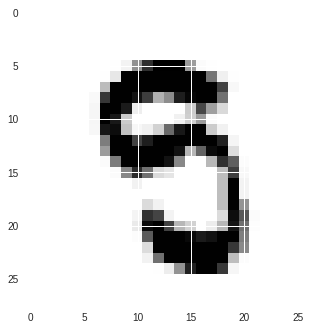

In [72]:
number = randint(0,len(x_test))
predictions = model.predict(X_test[number].reshape(1,28*28))
print("Modelprediction: " + str(predictions.argmax()))
plt.imshow(x_test[number])